In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [20]:
X_test = pd.read_csv('test.csv')
X_train = pd.read_csv('train.csv')

## Build model

In [21]:
clf = IsolationForest(random_state=16).fit(X_train)

In [22]:
def plot_decision_boundary(model, data):
    # Change the plot's size.
    plt.rcParams['figure.figsize'] = [10, 10]

    # Plot of the decision frontier
    xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.title("Decision Boundary (base model)")
    # This draw the "soft" or secondary boundaries.
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
    # This draw the line that separates the hard from the soft boundaries.
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    # This draw the hard boundary
    plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
    plt.scatter(data.iloc[:, 0],
                data.iloc[:, 1],
                edgecolors='k')
    plt.xlabel('Mean')
    plt.ylabel('SD')
    plt.grid(True)
    plt.show()

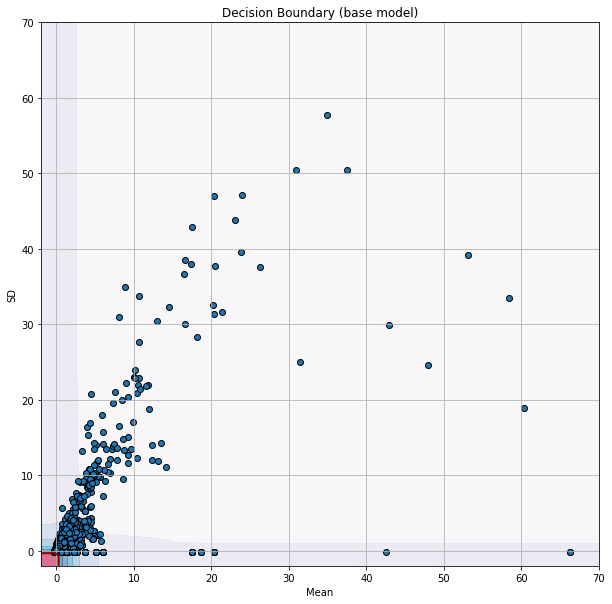

In [23]:
plot_decision_boundary(clf, X_train)

## Tune model - Increase the contamination

In [24]:
clf = IsolationForest(random_state=16, n_jobs=-1, contamination=0.001).fit(X_train)

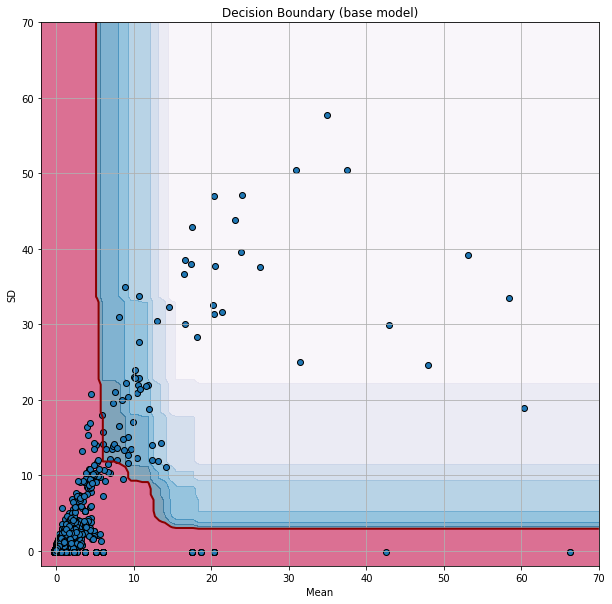

In [25]:
plot_decision_boundary(clf, X_train)

## Test the model
See if predictions fall outside the boundary

In [37]:
test_predictions = clf.predict(X_test)

In [50]:
predictions = pd.concat([X_test, pd.Series(test_predictions, name='is_anomaly')], axis=1)
# predictions = predictions.rename(columns={'0': 'is_anomaly'})
predictions.head()

,mean,sd,is_anomaly
0,-0.157953,-0.106749,1
1,-0.157953,-0.106749,1
2,-0.157953,-0.106242,1
3,-0.284889,-0.106749,1
4,-0.157953,-0.106242,1


In [53]:
pred_normal = predictions[predictions['is_anomaly'] == 1]
pred_anomaly = predictions[predictions['is_anomaly'] == -1]
# pred_anomaly = 

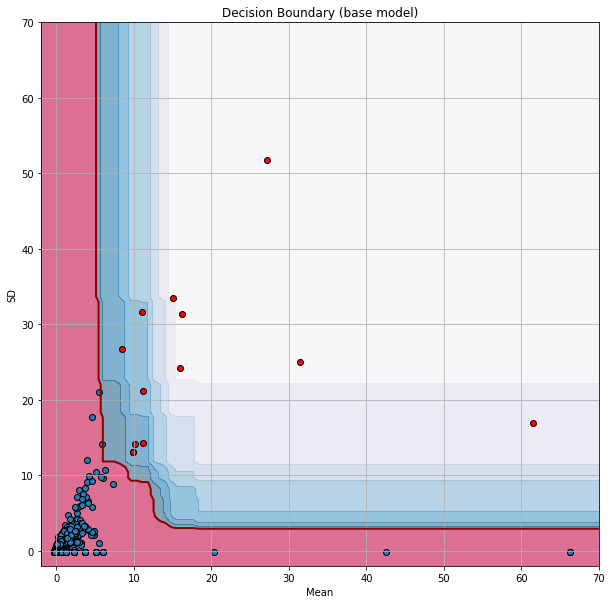

In [56]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [10, 10]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(pred_normal.iloc[:, 0],
            pred_normal.iloc[:, 1],
            c='#2c7bb6',
            edgecolors='k')
plt.scatter(pred_anomaly.iloc[:, 0],
            pred_anomaly.iloc[:, 1],
            c='#ff0000',
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

## Save the model

In [57]:
from joblib import dump

model_filename = 'model.joblib'

In [58]:
dump(clf, model_filename) 

['model.joblib']